In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据读取-图片
<br>

In [2]:
#读取彩色图
img = cv2.imread('./images/scsyl.jpg') #opencv读取格式为BGR不是RGB
print(img.shape)

#读取灰度图
img = cv2.imread('./images/scsyl.jpg',cv2.IMREAD_GRAYSCALE)
print(img.shape)

(640, 1024, 3)
(640, 1024)


In [3]:
#图像的显示（灰度图）
cv2.imshow('image',img)
cv2.waitKey(0) #0代表任意键退出
#cv2.waitKey(10000) #10秒后退出
cv2.destroyAllWindows()

In [4]:
#保存
cv2.imwrite('./images/huiduscsyl.jpg',img)

True

In [5]:
#基本属性
print(type(img))
print(img.size) #像素点数量
print(img.dtype)

<class 'numpy.ndarray'>
655360
uint8


# 数据读取-视频
<br>

In [6]:
vc= cv2.VideoCapture('./videos/001.mp4')

In [7]:
if vc.isOpened():
    open,frame = vc.read() #open返回bool值，frame返回当前帧的图像
    print('当前帧没问题')
else:
    open = False

当前帧没问题


In [8]:
while open:
    ret,frame = vc.read()
    if frame is None: #判断是否读完
        break
    if ret == True: #当前帧没问题
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        cv2.imshow('result',gray)
        if cv2.waitKey(8) & 0xff == 27:
            break
vc.release()
cv2.destroyAllWindows()

# 截取部分图像数据
<br>

In [9]:
#定义函数
def cv_show(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [10]:
img = cv2.imread('./images/scsyl.jpg')
scsyl = img[0:500,0:400]
cv_show('idl',scsyl)

# 颜色通道提取
<br>

In [11]:
b,g,r = cv2.split(img)

In [12]:
#不同颜色维度都是一样的，只是像素点不一样
print(b.shape)
print(g.shape)
print(r.shape)
print()

#合并
img_con = cv2.merge((b,g,r))
print(img_con.shape)

(640, 1024)
(640, 1024)
(640, 1024)

(640, 1024, 3)


In [13]:
#B,G,R索引为0,1,2

In [14]:
#只保留R
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,1] = 0
cv_show('R',cur_img)

In [15]:
#只保留G
cur_img = img.copy()
cur_img[:,:,0] = 0
cur_img[:,:,2] = 0
cv_show('G',cur_img)

In [16]:
#只保留B
cur_img = img.copy()
cur_img[:,:,1] = 0
cur_img[:,:,2] = 0
cv_show('B',cur_img)

# 边界填充
<br>

In [17]:
top_size,bottom_size,left_size,right_size = (50,50,50,50)

replicate = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REPLICATE) #其中之一
reflect = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img,top_size,bottom_size,left_size,right_size,borderType=cv2.BORDER_CONSTANT)

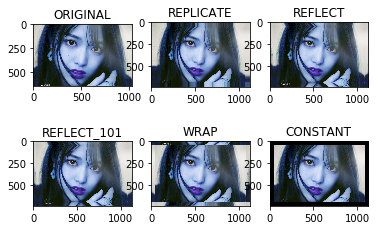

In [18]:
plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE') #复制法
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT') #反射法
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101') #反射法
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP') #外包装法
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT') #常量法

plt.show()

# 数值计算
<br>

In [19]:
img1 = cv2.imread('./images/001.png')
img2 = cv2.imread('./images/002.png')

In [20]:
img1s = img1+10 
img1[:5,:,0]

array([[230, 255, 242, ..., 241, 254, 229],
       [242, 255, 255, ..., 254, 254, 241],
       [242, 255, 255, ..., 254, 254, 241],
       [242, 255, 255, ..., 254, 254, 241],
       [242, 255, 255, ..., 254, 254, 241]], dtype=uint8)

In [21]:
img1s[:5,:,0]

array([[240,   9, 252, ..., 251,   8, 239],
       [252,   9,   9, ...,   8,   8, 251],
       [252,   9,   9, ...,   8,   8, 251],
       [252,   9,   9, ...,   8,   8, 251],
       [252,   9,   9, ...,   8,   8, 251]], dtype=uint8)

In [22]:
#相当于 %256
img1[:5,:,0] + img1s[:5,:,0]

array([[214,   8, 238, ..., 236,   6, 212],
       [238,   8,   8, ...,   6,   6, 236],
       [238,   8,   8, ...,   6,   6, 236],
       [238,   8,   8, ...,   6,   6, 236],
       [238,   8,   8, ...,   6,   6, 236]], dtype=uint8)

In [23]:
#如果相加结果大于255就等于255，否则就是相加结果
cv2.add(img1,img1s)[:5,:,0]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

# 图像融合
<br>

In [24]:
img.shape

(640, 1024, 3)

In [25]:
img1.shape

(1080, 1920, 3)

In [26]:
img1 = cv2.resize(img1,(1024,640)) #先列再行

In [27]:
resobject = cv2.addWeighted(img,0.6,img1,0.4,0) #img:x1, 0.6:α, img1:x2, 0.4:β, 0:b

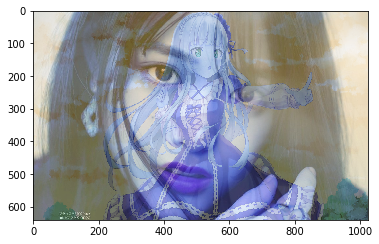

In [28]:
plt.imshow(resobject)

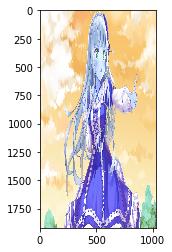

In [29]:
#按比例展示
res = cv2.resize(img1,(0,0),fx=1,fy=3)
plt.imshow(res)